#Install tensorflow-gpu 

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 377.0MB 79kB/s 
     |████████████████████████████████| 3.2MB 47.4MB/s 
ERROR: tensorflow 1.14.0rc1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.14.0 which is incompatible.
  Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1


In [0]:
import tensorflow as tf

In [3]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten ,Conv2D, MaxPooling2D
import numpy as np

Using TensorFlow backend.


# Load Data Using Pickel 

In [0]:
import pickle

In [0]:
#loading data form files
pickle_in = open("train_data.pickle","rb")
train_data = pickle.load(pickle_in)

pickle_in = open("train_labels.pickle","rb")
train_labels = pickle.load(pickle_in) 

pickle_in = open("test_data.pickle","rb")
test_data = pickle.load(pickle_in)

pickle_in = open("test_labels.pickle","rb")
test_labels = pickle.load(pickle_in) 

#Data Normalization

In [0]:
train_data = train_data/255.0

test_data = test_data/255.0

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


#Lets Start Building Model 

In [0]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = train_data.shape[1:])) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(2)) 
model.add(Activation('softmax')) 

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:

model.fit(train_data, train_labels, batch_size=16, epochs=10, validation_split=0.3)

W0622 19:54:17.772849 140419065186176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 280 samples, validate on 120 samples
Epoch 1/10
280/280 [==============================] - 6s 23ms/step - loss: 0.9595 - acc: 0.5893 - val_loss: 0.4479 - val_acc: 0.8417
Epoch 2/10
280/280 [==============================] - 0s 2ms/step - loss: 0.5643 - acc: 0.7357 - val_loss: 0.5230 - val_acc: 0.7583
Epoch 3/10
280/280 [==============================] - 0s 2ms/step - loss: 0.4287 - acc: 0.8107 - val_loss: 0.4920 - val_acc: 0.7417
Epoch 4/10
280/280 [==============================] - 0s 2ms/step - loss: 0.4951 - acc: 0.8179 - val_loss: 0.3318 - val_acc: 0.9000
Epoch 5/10
280/280 [==============================] - 0s 2ms/step - loss: 0.2996 - acc: 0.8786 - val_loss: 0.2485 - val_acc: 0.8750
Epoch 6/10
280/280 [==============================] - 0s 2ms/step - loss: 0.2410 - acc: 0.9036 - val_loss: 0.8398 - val_acc: 0.6667
Epoch 7/10
280/280 [==============================] - 0s 2ms/step - loss: 0.2285 - acc: 0.9071 - val_loss: 0.3076 - val_acc: 0.8917
Epoch 8/10
280/280 [=========

In [13]:
#Evaluating the network
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

if(test_acc > test_loss):
  print('yes')

100/100 [==============================] - 0s 3ms/step
test_acc: 0.81
test_loss: 0.4966139268875122
yes


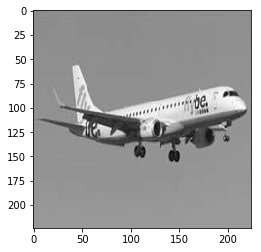

1

In [36]:
import matplotlib.pyplot as plt
import os
import cv2
dataDir = "/content/v_data/test/planes"
img = '50.jpg'
img_array = cv2.imread(os.path.join(dataDir,img),cv2.IMREAD_GRAYSCALE)
#new_img_array = cv2.resize(img_array,(224,224))
plt.imshow(img_array,cmap="gray")
plt.show()

checkImg = np.array(img_array).reshape(-1, 224, 224, 1)/255.0
p = model.predict(checkImg)
p.argmax()